In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import rcParams 
import scanpy as sc
import seaborn as sns

/home-2/jpopp4@jhu.edu/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


### Reclustering

In [2]:
adata = sc.read_h5ad('../data/katie.graphed.h5ad')

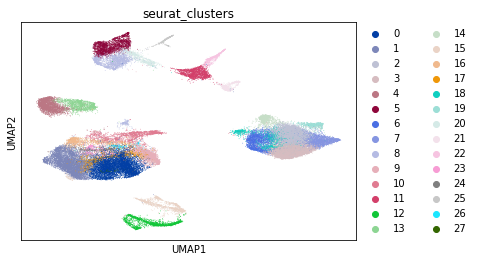

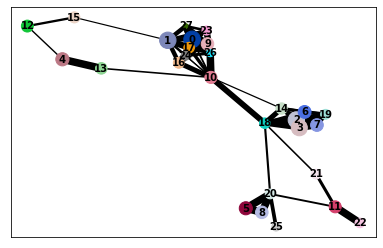

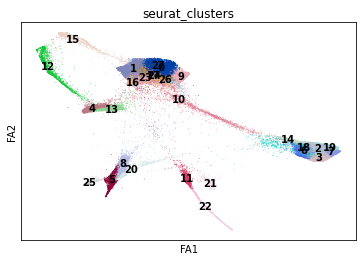

In [3]:
sc.pl.umap(adata, color=['seurat_clusters'])
sc.pl.paga(adata, color=['seurat_clusters'], threshold=.145)
sc.pl.draw_graph(adata, color=['seurat_clusters'], legend_loc='on data')

Try clustering the data again with a different clustering resolution

In [6]:
sc.tl.louvain(adata, resolution=0.5)

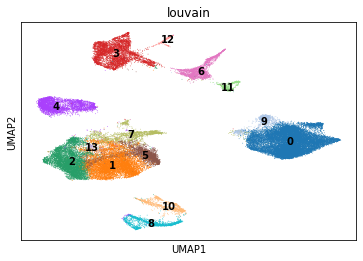

In [4]:
sc.pl.umap(adata, color=['louvain'], legend_loc='on data')

In [6]:
sc.tl.louvain(adata, resolution=0.15)

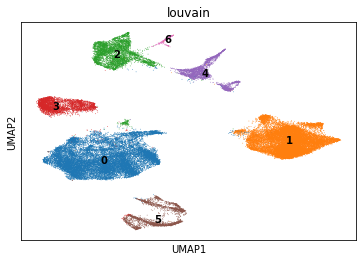

In [7]:
sc.pl.umap(adata, color=['louvain'], legend_loc='on data')

In [81]:
def clust2type(labs):
    types = []
    for i in range(len(labs)):
        if labs[i] == '0':
            types.append('early ectoderm')
        elif labs[i] == '1':
            types.append('iPSC')
        elif labs[i] == '2':
            types.append('mesoderm')
        elif labs[i] == '3':
            types.append('neural progenitor')
        elif labs[i] == '4':
            types.append('hepatocyte')
        elif labs[i] == '5':
            types.append('neuronal')
        elif labs[i] == '6':
            types.append('endothelial')
    return(pd.Categorical(types, categories=['iPSC', 'early ectoderm', 'neural progenitor', 'neuronal', 'hepatocyte', 'mesoderm', 'endothelial'], ordered=True))

In [82]:
adata.obs['celltype']=clust2type(adata.obs['louvain'])

In [87]:
marker_genes = ['POU5F1', 'NANOG', 'SOX10', 'GAP43', 'SOX17', 'HAND1', 'LUM', 'GNG11']

In [37]:
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

AttributeError: 'GridSpec' object has no attribute 'set_xlabel'

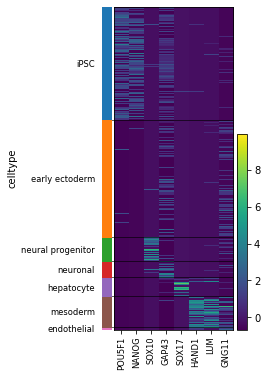

In [106]:
ax = sc.pl.heatmap(adata, var_names=marker_genes, groupby='celltype', show=False)
ax.set_xlabel('Marker Genes')
ax.set_ylabel('Cell Type')
ax.set_title('Marker Gene Expression Across Cell Types')

In [47]:
np.unique(adata.obs['celltype'])

array([''], dtype=object)

In [12]:
sc.tl.paga(adata, groups='louvain')

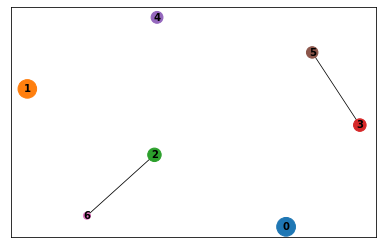

In [23]:
sc.pl.paga(adata, color=['louvain'], threshold=.05)

In [18]:
sc.tl.draw_graph(adata, init_pos='paga')

In [25]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain']  == '0')[2]
sc.tl.dpt(adata)

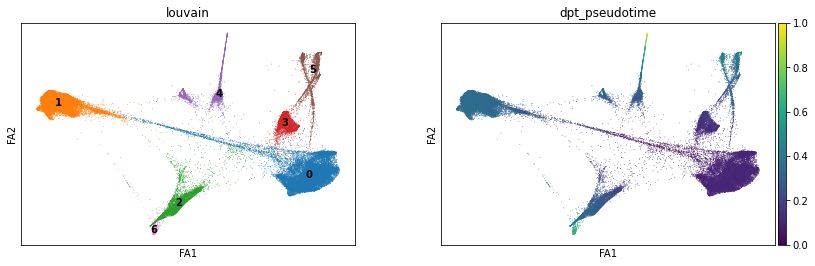

In [26]:
sc.pl.draw_graph(adata, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')

Text(0.5, 1.0, 'Pseudotime')

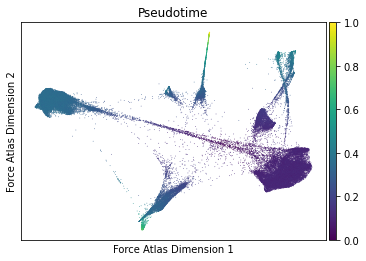

In [104]:
ax = sc.pl.draw_graph(adata, color=['dpt_pseudotime'], show=False)
ax.set_xlabel('Force Atlas Dimension 1')
ax.set_ylabel('Force Atlas Dimension 2')
ax.set_title('Pseudotime')

Text(0.5, 1.0, 'Embryoid Body Cell Types')

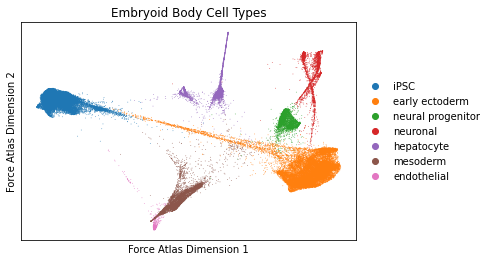

In [105]:
ax = sc.pl.draw_graph(adata, color=['celltype'], show=False)
ax.set_xlabel('Force Atlas Dimension 1')
ax.set_ylabel('Force Atlas Dimension 2')
ax.set_title('Embryoid Body Cell Types')

Text(0.5, 1.0, 'Embryoid Body Cell Types')

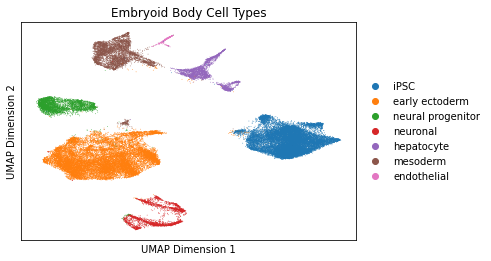

In [108]:
ax = sc.pl.umap(adata, color=['celltype'], show=False)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_title('Embryoid Body Cell Types')

In [99]:
adata.write('../data/katie.graphed_015.h5ad')

### Trajectory inference

In [2]:
adata = sc.read_h5ad("../data/katie.graphed_05.h5ad")

In [7]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain']  == '0')[2]
sc.tl.dpt(adata)

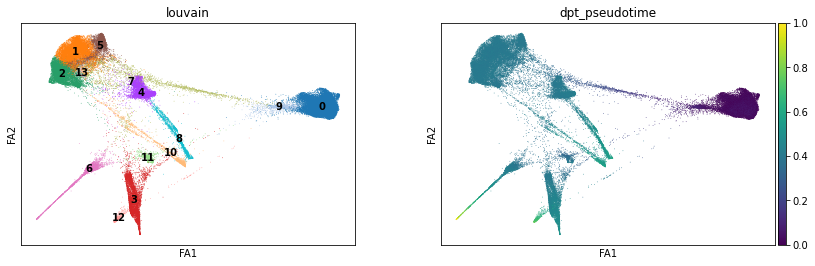

In [8]:
sc.pl.draw_graph(adata, color=['louvain','dpt_pseudotime'], legend_loc='on data')

In [9]:
endo = adata[adata.obs['louvain'].isin(['0','9','3','12'])]
endo.write("../data/endo_05.h5ad")
neur = adata[adata.obs['louvain'].isin(['0', '9', '5', '1', '2', '10'])]
neur.write("../data/neur_05.h5ad")
hep = adata[adata.obs['louvain'].isin(['0', '9', '6'])]
hep.write("../data/hep_05.h5ad")